In [559]:
import numpy as np
import pandas as pd
import re   # regular expression
print("Libraries Imported.")

Libraries Imported.


In [560]:
import warnings
warnings.filterwarnings("ignore")
print("Warnings ignored")

Warnings ignored


In [561]:
file_path = "email_dataset.csv"
data = pd.read_csv(file_path)   # csv file imported/loaded
data.head()

,labels,email_message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [562]:
print("Total no. of emails : ",data.shape[0])

Total no. of emails :  5571


In [563]:
for i in range(len(data['email_message'])):
    email_message = data['email_message'][i]                            # stores each mail into temp variable
    email_message = email_message.lower()                               # changes text to lowercase
    data['email_message'][i] = re.sub("[^a-zA-z ]","",email_message)    # removes extra spaces/tabs

In [564]:
data.head(2)

,labels,email_message
0,ham,ok lar joking wif u oni
1,spam,free entry in a wkly comp to win fa cup final...


In [565]:
data["labels"].value_counts()

labels
ham     4824
spam     747
Name: count, dtype: int64

In [566]:
for i in range(len(data["labels"])):
    if (data["labels"][i]=="ham"):
        data["labels"][i]= "legit"       # changing labels (ham -> legit) not actually needed


In [567]:
data.head(4)

,labels,email_message
0,legit,ok lar joking wif u oni
1,spam,free entry in a wkly comp to win fa cup final...
2,legit,u dun say so early hor u c already then say
3,legit,nah i dont think he goes to usf he lives aroun...


In [568]:
legit_mails = data[data["labels"] == "legit"]
spam_mails = data[data["labels"] == "spam"]

In [569]:
spam_mails.shape, legit_mails.shape

((747, 2), (4824, 2))

In [570]:
legit_mails = legit_mails.sample(1000)
spam_mails = spam_mails.sample(1000, replace=True)

In [571]:
spam_mails.shape, legit_mails.shape         # checking shape after resizing

((1000, 2), (1000, 2))

In [572]:
new_df = pd.concat([spam_mails, legit_mails], axis=0)
new_df.shape

(2000, 2)

In [573]:
print(new_df.duplicated().sum(), spam_mails.duplicated().sum(), legit_mails.duplicated().sum())


525 509 16


In [574]:
new_df["labels"].value_counts()

labels
spam     1000
legit    1000
Name: count, dtype: int64

In [575]:
new_df["labels"] = new_df["labels"].map({'spam': 1, 'legit': 0})

In [576]:
new_df

,labels,email_message
5491,1,marvel mobile play the official ultimate spide...
2132,1,your bu voucher wc is marsms log onto wwwbute...
4615,1,sunshine quiz win a super sony dvd recorder if...
1459,1,bought one ringtone and now getting texts cost...
1903,1,free entry in a weekly comp for a chance to w...
...,...,...
4427,0,so what did the bank say about the money
4707,0,wif my family booking tour package
3785,0,let me know if you need anything else salad or...
900,0,probably money worries things are coming due a...


In [577]:
x = new_df["email_message"]
y = new_df["labels"]

In [578]:
print(x)

5491    marvel mobile play the official ultimate spide...
2132    your bu voucher wc  is marsms log onto wwwbute...
4615    sunshine quiz win a super sony dvd recorder if...
1459    bought one ringtone and now getting texts cost...
1903    free entry in  a weekly comp for a chance to w...
                              ...                        
4427             so what did the bank say about the money
4707                   wif my family booking tour package
3785    let me know if you need anything else salad or...
900     probably money worries things are coming due a...
531           what todaysundaysunday is holidayso no work
Name: email_message, Length: 2000, dtype: object


In [579]:
x = x.values            # currently 'x' contains pandas series data that is now converted to a NumPy array

In [580]:
print(x)

['marvel mobile play the official ultimate spiderman game  on ur mobile right now text spider to  for the game  we ll send u a free ball wallpaper'
 'your bu voucher wc  is marsms log onto wwwbutelecom for discount credit to opt out reply stop customer care call '
 'sunshine quiz win a super sony dvd recorder if you canname the capital of australia text mquiz to  b'
 ...
 'let me know if you need anything else salad or desert or something how many beers shall i get'
 'probably money worries things are coming due and i have several outstanding invoices for work i did two and three months ago'
 'what todaysundaysunday is holidayso no work']


In [581]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
bow_obj = CountVectorizer(max_features=1500,stop_words='english')

x = bow_obj.fit_transform(x)                       # 

In [582]:
x_transformed = x.toarray()

In [583]:
print(x_transformed)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [584]:
y.shape, x_transformed.shape

((2000,), (2000, 1500))

In [585]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.15, random_state=40)

In [586]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
mnb = MultinomialNB()
bnb = BernoulliNB()
mnb.fit(x_train, y_train)
bnb.fit(x_train, y_train)

print("Algorithm trained on data")

print("Multinomial Naive bayes")
print("Training score : ", round(mnb.score(x_train,y_train)*100,6))
print("Testing score : ", round(mnb.score(x_test,y_test)*100, 6))
print()
print("Bernoli Naive bayes")
print("Training score : ", round(bnb.score(x_train,y_train)*100, 6))
print("Testing score : ", round(bnb.score(x_test,y_test)*100, 6))

Algorithm trained on data
Multinomial Naive bayes
Training score :  95.117647
Testing score :  93.333333

Bernoli Naive bayes
Training score :  96.117647
Testing score :  96.333333


In [587]:
prediction = mnb.predict(x_test)
print(prediction)

[1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0
 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1
 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0
 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1
 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1
 0 1 1 0]


In [588]:
y_test.values           # for comparison b/w predictrd and actual output value

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [589]:
# for model saving... libraries imported
import joblib, os
os.makedirs('models', exist_ok=True)        # a directory/folder 'models' is created

joblib.dump(mnb,'./models/multinomialnaivebayes.lb')
joblib.dump(bnb,'./models/bernoullinaivebayes.lb')
joblib.dump(bow_obj,'./models/countvectorizer.lb')

print("models are saved.")

models are saved.


In [590]:
# Model is succefully saved.
# Now Let's evaluate and check model's accuracy

In [591]:
evaluation_df = pd.DataFrame({"actual_class":y_test.values, "predicted_class":prediction})
evaluation_df.tail()

,actual_class,predicted_class
295,1,1
296,0,0
297,1,1
298,1,1
299,0,0


In [592]:
evaluation_df['actual_class'] = evaluation_df['actual_class'].map({1:'spam',0:'legit'})   # run only once...
evaluation_df['predicted_class'] = evaluation_df['predicted_class'].map({1:'spam',0:'legit'})

In [593]:
from sklearn.metrics import confusion_matrix, classification_report 
print("library for confusion matrix")    

library for confusion matrix


In [594]:
#confusion_matrix(ACTUAL_VALUES , PREDICTED_VALUES)
matrix = confusion_matrix(evaluation_df['actual_class'], evaluation_df['predicted_class'])
print(matrix)

[[153  13]
 [  7 127]]


In [595]:
print(classification_report(evaluation_df['actual_class'], evaluation_df['predicted_class']))

              precision    recall  f1-score   support

       legit       0.96      0.92      0.94       166
        spam       0.91      0.95      0.93       134

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [596]:
import matplotlib.pyplot as plt
import seaborn as sns

print("libraries for plots and graph")

libraries for plots and graph


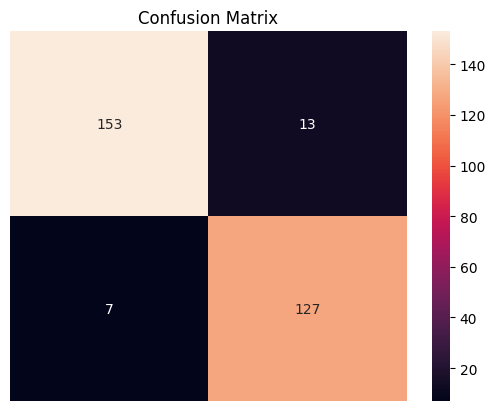

In [ ]:
sns.heatmap(matrix, annot=True, fmt='d')    # Format annotations with decimal/integer values
plt.title("Confusion Matrix")               # Display plot title
plt.axis(False)

# Display the plot
plt.show()